In [14]:
import shap

In [15]:
shap.initjs()

In [16]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
raw_data=pd.read_csv("dataset.csv") #Loading the dataset

Columns (0,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72) have mixed types. Specify dtype option on import or set low_memory=False.


In [18]:
raw_data['Unnamed: 73'].head(10)

0    PositionsDesc
1              DM 
2              GK 
3              DM 
4               S 
5               S 
6           D/WB R
7          DM/M RC
8              M R
9             D RC
Name: Unnamed: 73, dtype: object

In [70]:
label='Behavioral'
Bev_data = pd.DataFrame()
for column_name in raw_data.columns:
    if label in column_name:
        Bev_data[column_name]=raw_data[column_name]

Bev_data.dropna()
Bev_data.columns=Bev_data.iloc[0]
Bev_data = Bev_data.drop([0])
Bev_data.reset_index(drop=True,inplace=True)

In [71]:
Bev_features_names=Bev_data.columns
print(Bev_features_names)

Index(['Communication', 'Eccentricity', 'Aggression', 'Anticipation',
       'Bravery', 'Composure', 'Concentration', 'Vision', 'Decisions',
       'Determination', 'Flair', 'Leadership', 'Positioning', 'Teamwork',
       'Consistency', 'Dirtiness', 'Versatility', 'Adaptability', 'Ambition',
       'Loyalty', 'Pressure', 'Professional', 'Sportsmanship', 'Temperament',
       'Controversy'],
      dtype='object', name=0)


In [72]:
label='Technical'
Tech_data = pd.DataFrame()
for column_name in raw_data.columns:
    if label in column_name:
        Tech_data[column_name]=raw_data[column_name]

Tech_data.dropna()
Tech_data.columns=Tech_data.iloc[0]
Tech_data = Tech_data.drop([0])
Tech_data.reset_index(drop=True,inplace=True)

In [73]:
Tech_features_names=Tech_data.columns
print(Tech_features_names)

Index(['AerialAbility', 'CommandOfArea', 'Handling', 'Kicking', 'OneOnOnes',
       'Reflexes', 'RushingOut', 'TendencyToPunch', 'Throwing', 'Corners',
       'Crossing', 'Dribbling', 'Finishing', 'FirstTouch', 'Freekicks',
       'Heading', 'LongShots', 'Longthrows', 'Marking', 'Passing',
       'PenaltyTaking', 'Tackling', 'Technique', 'OffTheBall', 'Workrate',
       'Acceleration', 'Agility', 'Balance', 'Jumping', 'LeftFoot',
       'NaturalFitness', 'Pace', 'RightFoot', 'Stamina', 'Strength',
       'ImportantMatches', 'InjuryProness'],
      dtype='object', name=0)


In [74]:
data = raw_data.dropna()
data.columns = data.iloc[0]
data = data.drop([0])
data.reset_index(drop=True, inplace=True)
data.head()

,UID,,NationID,Born,Age,IntCaps,IntGoals,U21Caps,U21Goals,Height,...,Versatility,Adaptability,Ambition,Loyalty,Pressure,Professional,Sportsmanship,Temperament,Controversy,PositionsDesc
0,1000055,Wilfred Bamnjo,11,27-03-1980,36,0,0,0,0,178,...,4,20,6,3,9,3,10,14,11,DM
1,1000331,Wang Wei,110,20-02-1982,34,0,0,0,0,188,...,6,14,10,7,11,11,12,10,6,GK
2,1000334,Liu Yang,110,11/4/1982,34,0,0,0,0,183,...,5,9,11,14,7,11,13,10,8,DM
3,1000337,Song Qi,110,7/4/1985,31,0,0,0,0,170,...,6,16,13,11,9,10,13,13,7,S
4,1000340,Chen Lei,110,20-01-1983,33,0,0,0,0,181,...,5,13,11,9,10,12,10,19,8,S


In [86]:
all_labels = set()
for labels_str in data['PositionsDesc']:
    labels1 = labels_str.split('/')
    for label in labels1:
        labels = label.split(' ')[0]
        all_labels.add(labels)
print(all_labels)
position=np.array(list(all_labels))
print(position)


{'M', 'S', 'DM', 'AM', 'C', 'WB', 'D', 'GK'}
['M' 'S' 'DM' 'AM' 'C' 'WB' 'D' 'GK']


In [76]:
for label in all_labels:
    data[label]=data['PositionsDesc'].apply(lambda x: 1 if label in x else 0)

In [77]:
for label in all_labels:
    Bev_data[label]=data[label]
    Tech_data[label]=data[label]
Bev_data.dropna(inplace=True)
Tech_data.dropna(inplace=True)

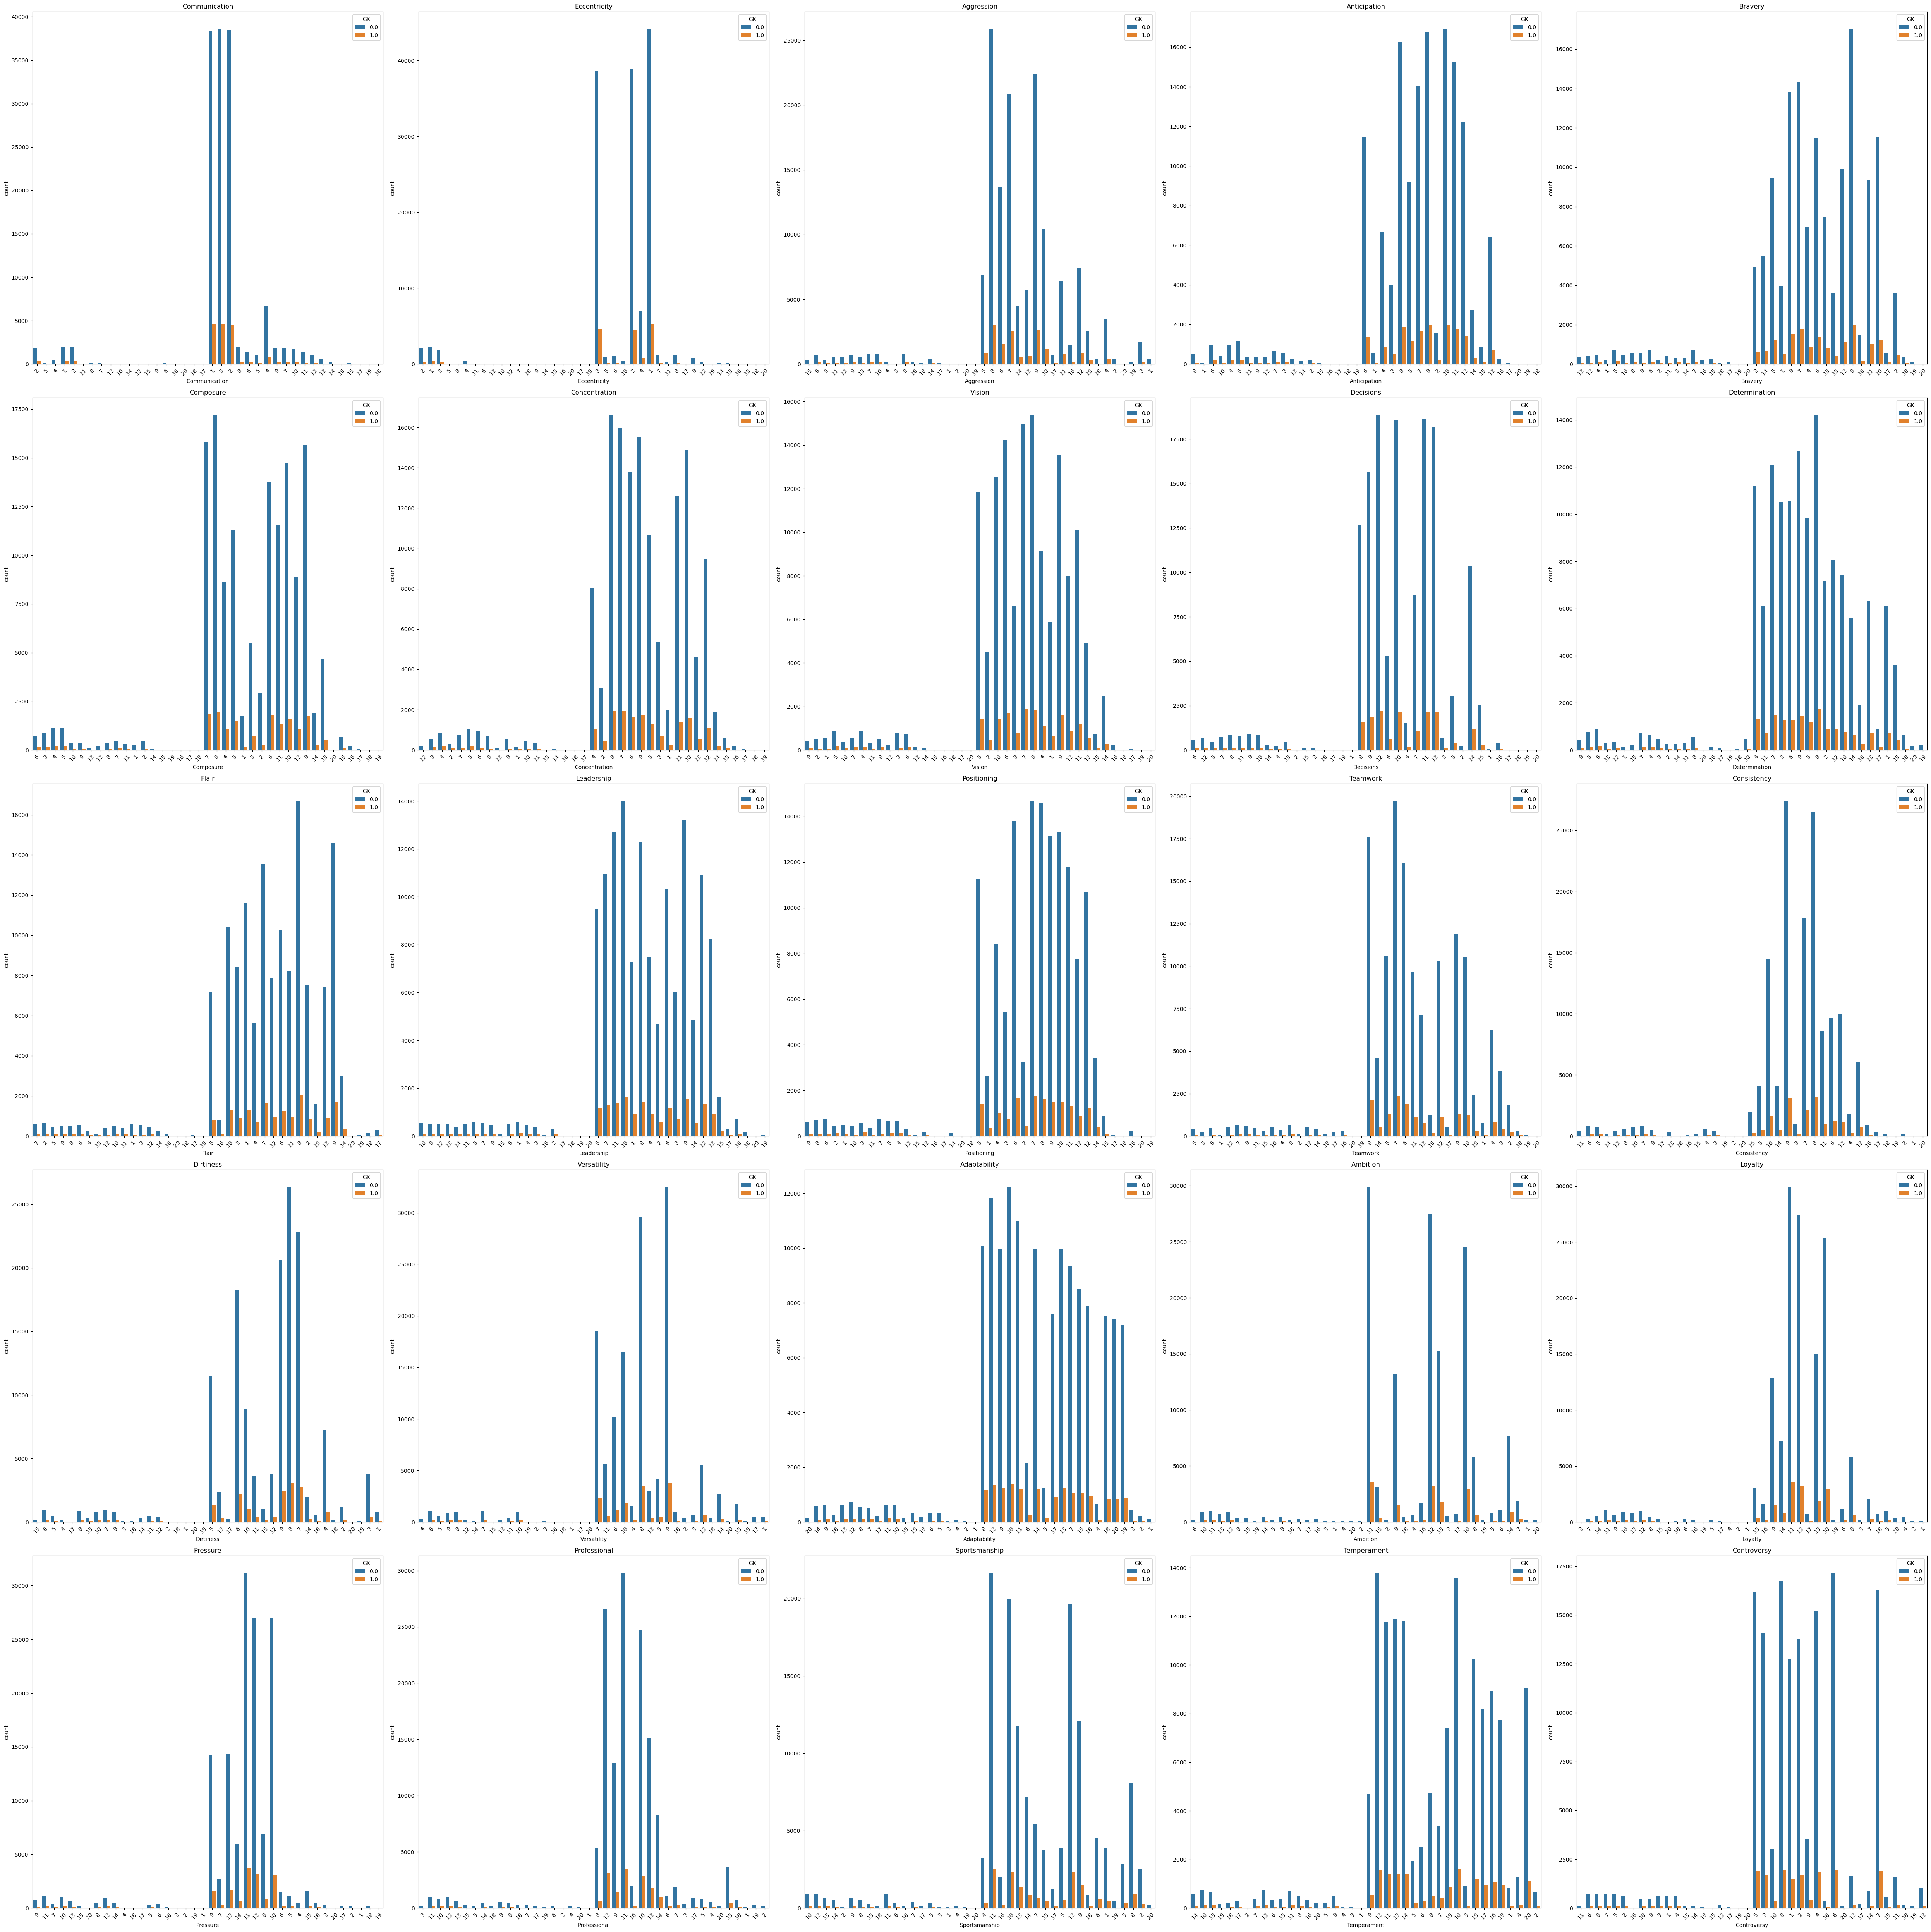

In [78]:
'''
position='GK'
plt.figure(figsize=(50,50))
for i,features in enumerate(Bev_features_names,1):
    plt.subplot(5,5,i)
    sns.countplot(x=features, data=Bev_data, hue=position)
    plt.title(f'{features}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
'''

In [16]:
'''
gk_0 = potential_dataset[potential_dataset['GK']==0]
gk_1 = potential_dataset[potential_dataset['GK']==1]
y_count=gk_1['AerialAbility'].value_counts()
y_count=y_count.sort_index()
print(y_count)
'''

"\ngk_0 = potential_dataset[potential_dataset['GK']==0]\ngk_1 = potential_dataset[potential_dataset['GK']==1]\ny_count=gk_1['AerialAbility'].value_counts()\ny_count=y_count.sort_index()\nprint(y_count)\n"

In [87]:
bev_features=Bev_data.drop(position,axis=1)
tech_features=Tech_data.drop(position,axis=1)

In [80]:
from sklearn.preprocessing import StandardScaler

In [88]:
scaler = StandardScaler()
standardized_features_bev =pd.DataFrame(scaler.fit_transform(bev_features))
standardized_features_tech =pd.DataFrame(scaler.fit_transform(tech_features))
standardized_features_bev.columns=bev_features.columns
standardized_features_tech.columns=tech_features.columns

In [89]:
from sklearn.decomposition import PCA

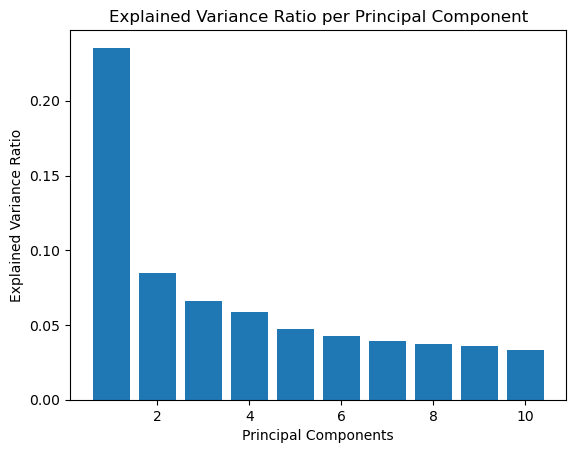

In [102]:
num_components_bev = 10
pca_bev = PCA(n_components=num_components_bev)
pca_bev_result = pca_bev.fit_transform(standardized_features_bev)
pca_bev_columns = [f"PC_bev{i+1}" for i in range(num_components_bev)]
pca_bev_df = pd.DataFrame(data=pca_bev_result, columns=pca_bev_columns)
explained_variance_ratio_bev = pca_bev.explained_variance_ratio_
plt.bar(range(1, num_components_bev + 1), explained_variance_ratio_bev)
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Ratio per Principal Component")
plt.show()


In [103]:
cumulative_variance_ratio_bev= np.cumsum(explained_variance_ratio_bev)
print(cumulative_variance_ratio_bev)

[0.23548605 0.31994102 0.38614236 0.44483552 0.49225859 0.53505196
 0.57452953 0.61170039 0.64756143 0.68113107]


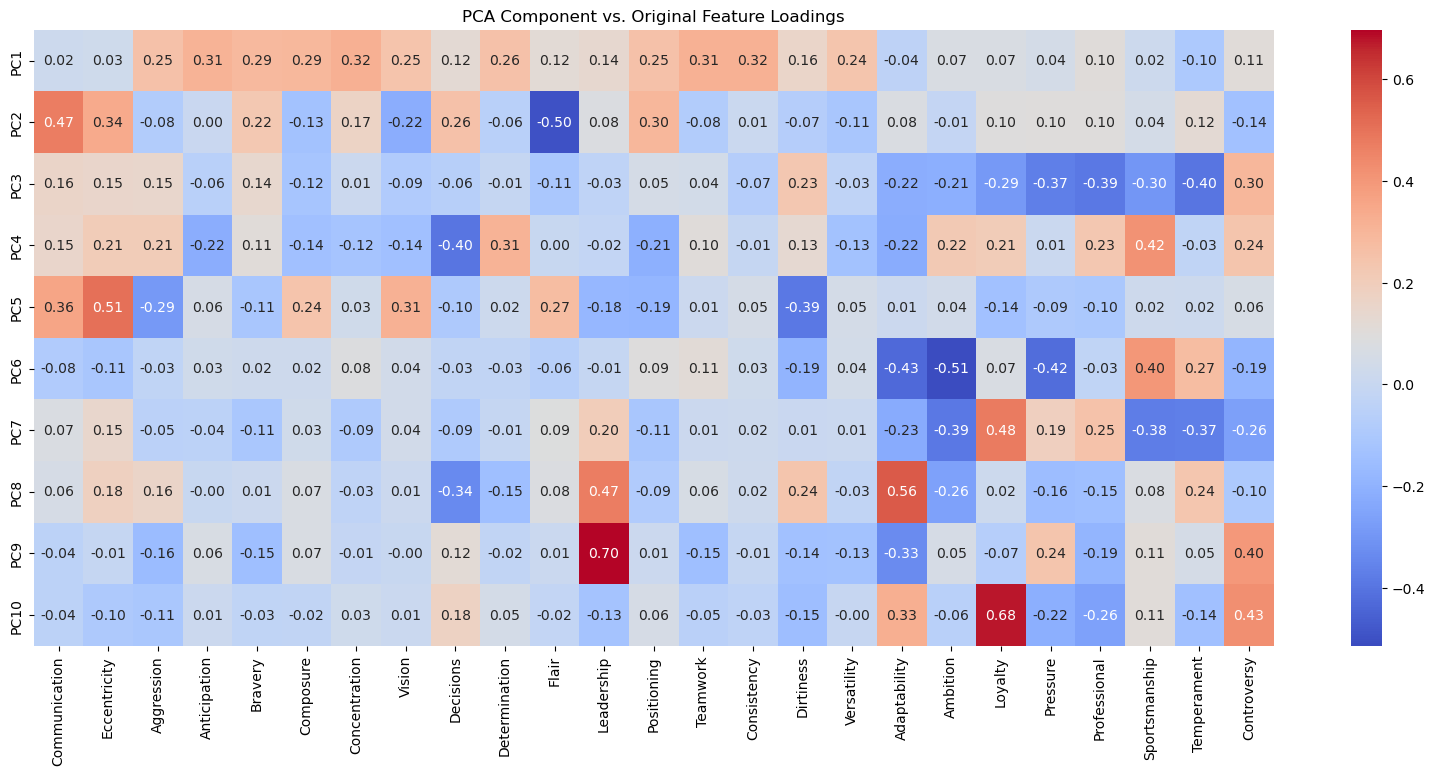

In [104]:
feature_loadings_bev = pca_bev.components_
component_names_bev = [f"PC{i+1}" for i in range(len(feature_loadings_bev))]
feature_names_bev = list(standardized_features_bev.columns) # Assuming you have column names
loadings_df_bev = pd.DataFrame(feature_loadings_bev, columns=feature_names_bev, index=component_names_bev)
plt.figure(figsize=(20, 8))
sns.heatmap(loadings_df_bev, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('PCA Component vs. Original Feature Loadings')
plt.show()


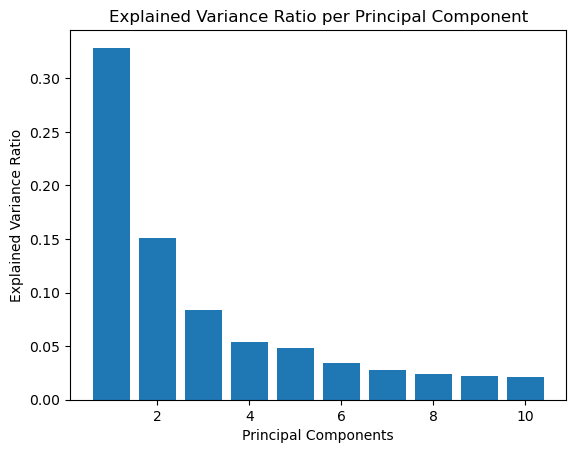

In [107]:

num_components_tech=10
pca_tech = PCA(n_components=num_components_tech)
pca_tech_result = pca_tech.fit_transform(standardized_features_tech)
pca_tech_columns = [f"PC_tech{i+1}" for i in range(num_components_tech)]
pca_tech_df = pd.DataFrame(data=pca_tech_result, columns=pca_tech_columns)

explained_variance_ratio_tech = pca_tech.explained_variance_ratio_
plt.bar(range(1, num_components_tech + 1), explained_variance_ratio_tech)
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Ratio per Principal Component")
plt.show()


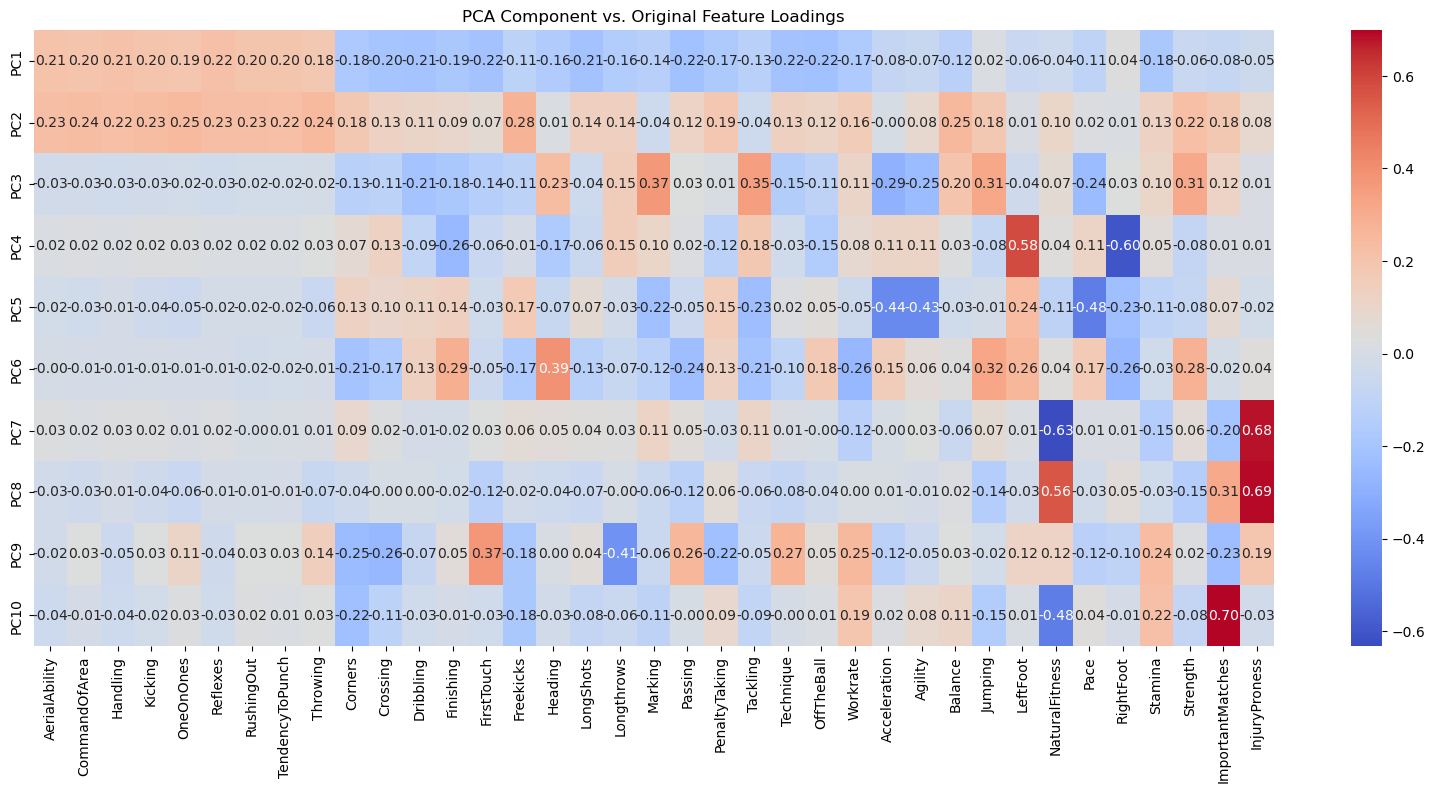

In [109]:

feature_loadings_tech = pca_tech.components_
component_names_tech = [f"PC{i+1}" for i in range(len(feature_loadings_tech))]
feature_names_tech = list(standardized_features_tech.columns) # Assuming you have column names
loadings_df_tech = pd.DataFrame(feature_loadings_tech, columns=feature_names_tech, index=component_names_tech)
plt.figure(figsize=(20, 8))
sns.heatmap(loadings_df_tech, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('PCA Component vs. Original Feature Loadings')
plt.show()


In [110]:
cumulative_variance_ratio_tech= np.cumsum(explained_variance_ratio_tech)
print(cumulative_variance_ratio_tech)

[0.32852232 0.47981539 0.56331419 0.6169312  0.66523448 0.69981357
 0.72723653 0.75122674 0.77366002 0.79444204]


In [204]:
pred_act_df = pd.DataFrame()

In [288]:
print(all_labels)
target_input=input("Enter the positon to predict: ")

{'M', 'S', 'DM', 'AM', 'C', 'WB', 'D', 'GK'}
Enter the positon to predict: GK


In [289]:
y=data[target_input]
y.dropna(inplace=True)

In [290]:
y.value_counts()

0    142379
1     17130
Name: GK, dtype: int64

In [278]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score


In [279]:
'''
standardized_features_bev['UID']=data['UID']
standardized_features_bev[Bev_features_names]=standardized_features_bev[Bev_features_names].astype(int)
standardized_features_tech['UID']=data['UID']
standardized_features_tech[Tech_features_names]=standardized_features_tech[Tech_features_names].astype(int)
X_df=pd.merge(standardized_features_bev,standardized_features_tech)
X_df.drop('UID',inplace=True,axis=1)
'''
pca_bev_df['UID']=data['UID']
pca_tech_df['UID']=data['UID']
X_df=pd.merge(pca_bev_df,pca_tech_df)
X_df.drop('UID',inplace=True,axis=1)

In [280]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

In [291]:
X=X_df
Y=y

In [292]:
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], 
                           n_informative=3, n_redundant=1, flip_y=0, 
                           n_features=20, n_clusters_per_class=1, n_samples=15909, 
                           random_state=42)

smote = SMOTE(random_state=42) 
X_resampled,y_resampled = smote.fit_resample(X,y)

In [293]:
X_train, X_val, y_train, y_val = train_test_split(X_resampled,y_resampled , test_size=0.3, random_state=42)

In [294]:
'''
param_grid = {
    'n_estimators': [70,100],          
    'max_depth': [None, 10, 20, 30],          
    'min_samples_split': [2, 5, 10],          
    'min_samples_leaf': [1, 2, 4],            
    'max_features': ['sqrt', 'log2']  
}
classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train,y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
'''
best_random_forest_model = RandomForestClassifier(random_state=42, max_depth=10,max_features='sqrt',
                                                  min_samples_leaf=2,min_samples_split=2,n_estimators=100)
best_random_forest_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, random_state=42)

In [295]:
y_pred = best_random_forest_model.predict(X_val)

In [296]:
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, best_random_forest_model.predict_proba(X_val)[:, 1])

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Test Accuracy: 0.9999
Precision: 0.9998
Recall: 1.0000
F1 Score: 0.9999
ROC AUC: 1.0000


In [297]:
pred_act_df['Predicted Value ' + target_input] = y_pred
pred_act_df['Actual Value ' + target_input] = y_val

In [200]:
import sklearn

In [201]:
X_instance=X_train[:15]

explainer = shap.Explainer(best_random_forest_model,X_train)
shap_values = explainer.shap_values(X_instance)

In [203]:
shap.force_plot(explainer.expected_value[1],shap_values[1],X_instance)


In [298]:
filename='RandomForestPrediction.csv'
pred_act_df.to_csv(filename,index=False)